In [46]:
%pylab qt
%matplotlib inline

import pandas
import fitting
import scipy.constants as cst
from scipy.integrate import quad

Populating the interactive namespace from numpy and matplotlib


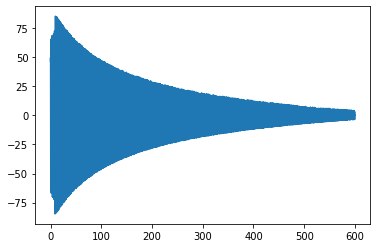

In [9]:
folder = "tp_non_linearite/"
file = "pendule_10ab.txt"

raw = np.loadtxt(folder+file, skiprows=1)
x, y = [], []
for row in raw:
    x.append(row[0])
    y.append(row[1])
data = pandas.Series(y, index=x)

plt.plot(data.index, data.values)

[   0.69748709  -46.27661005 -123.43392303    0.30055706]


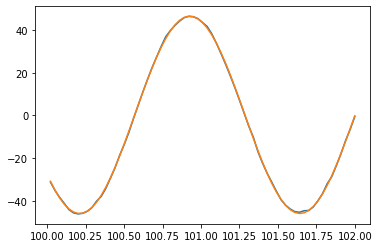

In [23]:
period = 2

portion = data[100:100+period]

plt.plot(portion)

fitter = fitting.Fit("sin", x=portion.index, y=portion.values)
fit_params, ufit_params = fitter.fit(manualguess_params=None, verbosemode=False)

print(fit_params)

x = portion.index.values
y = fitter.func(x, fit_params[0],fit_params[1], fit_params[2], fit_params[3])

plt.plot(x,y)

In [39]:
step = 3

stop = data.index.max()
start = 10
end = start + step

period, amplitude = [], []

while end < stop:
    portion = data[start:end]
    start = end
    end  += step
    fitter = fitting.Fit("sin", x=portion.index, y=portion.values)
    fit_params, ufit_params = fitter.fit(manualguess_params=None, verbosemode=False)
    period.append(1/fit_params[0])
    amplitude.append(np.abs(fit_params[1]))
    
amplitude = np.array(amplitude)
period    = np.array(period)

In [51]:
def period_integral(theta, l=length, g=cst.g):
    def func(phi):
        k = np.sin(theta/2)
        return 1/np.sqrt(1-k**2*(np.sin(phi))**2)
    integral = quad(func, 0, np.pi/2)
    T0 = 2*np.pi*np.sqrt(l/g)
    return 2*T0/np.pi*integral[0]

period_integ = []
for amp in amplitude:
    period_integ.append(period_integral(amp*np.pi/180))

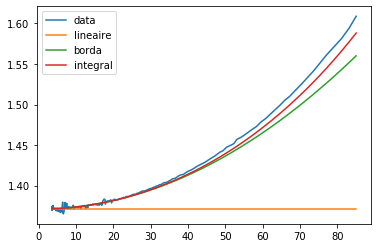

In [53]:
length = 0.467
period_linarized = 2*np.pi*np.sqrt(length/cst.g)
period_borda     = period_linarized*(1+(amplitude*np.pi/180)**2/16)

plt.plot(amplitude, period, label="data")
plt.plot(amplitude, period_linarized*np.ones(len(amplitude)), label="lineaire")
plt.plot(amplitude, period_borda, label="borda")
plt.plot(amplitude, period_integ, label="integral")

plt.legend(loc="best")

In [55]:
1e-6/4/np.pi**2/0.1

2.533029591058444e-07

In [56]:
2*np.pi*np.sqrt(0.5*52e-9)

0.0010131331885360846